In [1]:
import sys
sys.path.append("..")
import os

In [2]:
from tokenizer.sentencepiece import SentencePieceTokenizer
from tokenizer.mecab import MeCabTokenizer
from tokenizer.mecab_sp import MeCabSentencePieceTokenizer
from tokenization import BertTokenizer

tokenizer_dir = os.path.join("../resources", "mecab_sp-64k")
mecab = MeCabTokenizer(os.path.join(tokenizer_dir, "tok.json")) 
sp = SentencePieceTokenizer(os.path.join(tokenizer_dir, "tok.model"))
custom_tokenizer = MeCabSentencePieceTokenizer(mecab, sp)
tokenizer = BertTokenizer(os.path.join(tokenizer_dir, "tok.vocab.txt"), custom_tokenizer)

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


In [3]:
tokenizer.save_model("wordPieceTokenizer", "my_tokenizer_mecab_sp")

AttributeError: 'BertTokenizer' object has no attribute 'save_model'

In [4]:
tokenizer.vocab_size

64000

In [5]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)

['▁이순신', '▁은', '▁조선', '▁중기', '▁의', '▁무신', '▁이', '▁다', '▁.']


In [10]:
from transformers import AutoConfig, AutoModelForSequenceClassification

MODEL_NAME = "klue/bert-base"
model_config =  AutoConfig.from_pretrained(MODEL_NAME)
model_config.num_labels = 30
# model_config.vocab_size = 64000

model =  AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=model_config)
model.resize_token_embeddings(tokenizer.vocab_size)
print(model.config)


Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

BertConfig {
  "_name_or_path": "klue/bert-base",
  "architectures": [
    "BertForPretraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28",
    "29": "LABEL_29"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
 

In [19]:
import pandas as pd

total_df = pd.read_csv("/opt/ml/dataset/train/train.csv")
total_df

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [20]:
subject_entity = []
object_entity = []
for i,j in zip(total_df['subject_entity'], total_df['object_entity']):
    i = eval(i)['word']
    j = eval(j)['word']

    subject_entity.append(i)
    object_entity.append(j)
out_dataset = pd.DataFrame({'id':total_df['id'], 'sentence':total_df['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':total_df['label'],})
out_dataset

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation
...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,유기준,부산 서구·동구,per:employee_of
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",최시형,손병희,per:colleagues
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,완도군,신우철,org:top_members/employees
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",JTBC,중앙홀딩스,no_relation


In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
morphs = mecab.morphs(out_dataset['sentence'][0])
print(morphs)

NameError: name 'out_dataset' is not defined

In [38]:
tokenized_text = tokenizer.tokenize(out_dataset['sentence'][1])
print(tokenized_text)

['▁호남', '▁이', '▁기반', '▁인', '▁바른', '▁미래', '▁당', '▁', '·', '▁대안', '▁신', '▁당', '▁', '·', '▁민주', '▁평화', '▁당', '▁이', '▁우여곡절', '▁끝', '▁에', '▁합당', '▁해', '▁민생', '▁당', '▁(', '▁가칭', '▁)', '▁으로', '▁재', '▁탄생', '▁한다', '▁.']


In [39]:
from transformers import AutoTokenizer

MODEL_NAME = "klue/bert-base"
pre_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

['호남',
 '##이',
 '기반',
 '##인',
 '바른',
 '##미',
 '##래',
 '##당',
 '·',
 '대안',
 '##신',
 '##당',
 '·',
 '민주',
 '##평',
 '##화',
 '##당',
 '##이',
 '우여곡절',
 '끝',
 '##에',
 '합당',
 '##해',
 '민생',
 '##당',
 '(',
 '가칭',
 ')',
 '으로',
 '재',
 '##탄',
 '##생',
 '##한다',
 '.']

In [42]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

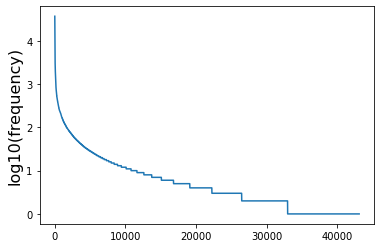

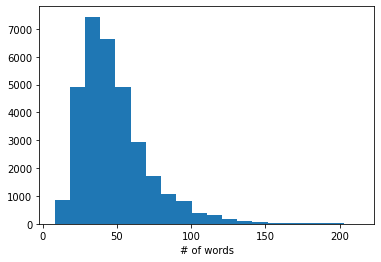

In [43]:
def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 형태소 단위로 토큰화
    for text in texts: 
        texts_lens.append(len(text))
      
        words = tokenizer.tokenize(text)
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=300)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """

    # 등장 빈도순으로 단어를 정렬하여 시각화
    sorted_words = sorted(counter.items(), key=lambda item: (-item[1], item[0]))
    sorted_frequency_logscale = [np.log10(el[1]) for el in sorted_words]
    indices = np.arange(len(sorted_frequency_logscale))
    plt.plot(indices, sorted_frequency_logscale)
    plt.ylabel('log10(frequency)', fontsize=16)
    plt.show()

    # 문장 단어 개수에 대한 히스토그램 시각화
    plt.hist(word_lens_per_sent, bins=20)
    plt.xlabel("# of words")
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:300]}

EDA_Mecab_result = myFunction(out_dataset['sentence'])

In [44]:
EDA_Mecab_result

{'texts': 32470,
 'num_unique_words': 43126,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 213,
 'word_minumum': 8,
 'word_mean': 48.123098244533416,
 'word_median': 43.0,
 'TOP10_word': ['▁,',
  '▁의',
  '▁.',
  '▁다',
  '▁을',
  '▁이',
  '▁는',
  '▁에',
  '▁하',
  '▁',
  '▁년',
  '▁(',
  '▁를',
  '▁)',
  '▁은',
  '▁고',
  '▁일',
  '▁에서',
  '▁가',
  '▁로',
  '▁으로',
  '▁한',
  '▁월',
  '▁했',
  '▁과',
  '▁와',
  '▁었',
  '▁인',
  '▁되',
  '▁있',
  '▁였',
  "▁'",
  '▁1',
  '▁들',
  '▁2',
  '▁"',
  '▁등',
  '▁도',
  '▁3',
  '▁어',
  '▁여',
  '▁며',
  '▁그',
  '▁기',
  '▁적',
  '▁해',
  '▁던',
  '▁4',
  '▁세',
  '▁-',
  '·',
  '▁자',
  '▁게',
  '▁당',
  '▁대표',
  '▁것',
  '▁5',
  '▁리그',
  '▁전',
  '▁제',
  '▁된',
  '▁대',
  '▁에게',
  '‘',
  '’',
  '▁씨',
  '▁지',
  '▁10',
  '▁6',
  '▁한국',
  '▁선수',
  '▁명',
  '▁까지',
  '▁받',
  '▁7',
  '▁8',
  '“',
  '▁부터',
  '”',
  '▁팀',
  '▁대한민국',
  '▁만',
  '▁경기',
  '▁면서',
  '▁았',
  '▁함께',
  '▁9',
  '▁11',
  '▁중',
  '▁할',
  '▁밝혔',
  '▁~',
  '▁대통령',
  '▁수',